In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

import os
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning) 

import pandas as pd

import copy

import hypernetx as hnx

In [2]:
import networkx as nx
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import seaborn as sns

import scipy as sc
import scipy.sparse as sp

In [3]:
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [4]:
import random

random.seed(10)

In [5]:
# CHECKPOINT
edges_li = pickle.load(open('/Users/saravallejomengod/MathsYear4/M4R/utils/Data/dHSIC_found/dHSIC_LI.pkl', 'rb'))
edges_lmi = pickle.load(open('/Users/saravallejomengod/MathsYear4/M4R/utils/Data/dHSIC_found/dHSIC_LMI.pkl', 'rb'))
edges_umi = pickle.load(open('/Users/saravallejomengod/MathsYear4/M4R/utils/Data/dHSIC_found/dHSIC_UMI.pkl', 'rb'))
edges_hi = pickle.load(open('/Users/saravallejomengod/MathsYear4/M4R/utils/Data/dHSIC_found/dHSIC_HI.pkl', 'rb'))

In [8]:
# CHECKPOINT
edges_e = pickle.load(open('/Users/saravallejomengod/MathsYear4/M4R/utils/Data/dHSIC_found/dHSIC_Europe.pkl', 'rb'))
edges_as = pickle.load(open('/Users/saravallejomengod/MathsYear4/M4R/utils/Data/dHSIC_found/dHSIC_Asia.pkl', 'rb'))
edges_af = pickle.load(open('/Users/saravallejomengod/MathsYear4/M4R/utils/Data/dHSIC_found/dHSIC_Africa.pkl', 'rb'))
edges_am = pickle.load(open('/Users/saravallejomengod/MathsYear4/M4R/utils/Data/dHSIC_found/dHSIC_Americas.pkl', 'rb'))

In [6]:
colors_SDG = {1:(229/255, 36/255, 59/255), 2:(221/255, 166/255, 58/255), 3:(76/255, 159/255, 56/255), 
              4: (197/255, 25/255, 45/255), 5:(1, 58/255, 33/255), 6: (38/255, 189/255, 226/255),
              7: (252/255,195/255, 11/255), 8: (162/255,25/255, 66/255), 9: (253/255, 105/255, 37/255),
              10: (221/255, 19/255, 103/255), 11: (253/255, 157/255, 36/255), 12:(191/255, 139/255, 46/255), 
              13: (63/255, 126/255, 68/255), 14: (10/255, 151/255, 217/255), 15: (86/255, 192/255, 43/255),
              16: (0, 104/255, 157/255), 17:(25/255, 72/255, 106/255) }

In [7]:
#create different colormaps for each hyperedge size
cmap6 = plt.cm.spring
cmap5 = plt.cm.Purples
cmap4 = plt.cm.Greens
cmap3 = plt.cm.Blues
cmap2 = plt.cm.Reds

cmaps_list = [cmap2, cmap3, cmap4, cmap5, cmap6]

In [46]:
def plot_whole_hx(H, cmaps_list, name, shortname):
    """Plot hypergraphs with edge colors from different colormaps according to their sizes"""
    alpha=0.5
    sizes = np.array([len(e) for e in H.edges()])
    
    max_s = sizes.max()
    
    counts = [np.count_nonzero(sizes==i+2) for i in range(max_s-1)]
    
    norms=[]
    cmaps=[]
    mids = []
    for i in range(max_s-1):
        norms.append(plt.Normalize(0, 3*counts[i]))
        cmaps.append(cmaps_list[i])
        mids.append(round(3*counts[i]/2))
    
    colour_edges = []
    js = [0 for i in range(max_s-1)]
    for i in range(len(sizes)):
        edge_len = sizes[i]
        norm = norms[edge_len-2]
        colmap = cmaps[edge_len-2]
        mid = mids[edge_len-2]
        js[edge_len-2] += 1
        
        if edge_len==2:
            col_list = list(colmap(norm(mid+js[edge_len-2])))
            col_list[-1] = alpha
            col_alpha = tuple(col_list)
            colour_edges.append(col_alpha)
        else:
            colour_edges.append(colmap(norm(mid+js[edge_len-2])))
    
    plt.figure(figsize=(10,10))
    plt.tight_layout() 
    plt.title(name, fontdict={'fontsize': 30})
    
    hnx.draw(H, with_edge_labels=False,edges_kwargs={'edgecolors': colour_edges}, 
             node_labels_kwargs={'fontsize': 16}, pos=nx.circular_layout(H))
    plt.savefig('/Users/saravallejomengod/MathsYear4/M4R/utils/hx/{}_ALL.png'.format(shortname), format='png',bbox_inches='tight')
    

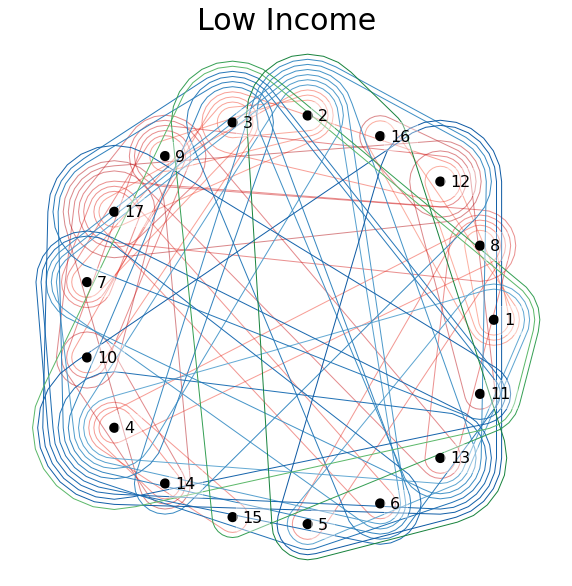

In [47]:
H_li = hnx.Hypergraph(edges_li)

plot_whole_hx(H_li, cmaps_list, "Low Income", "LI")

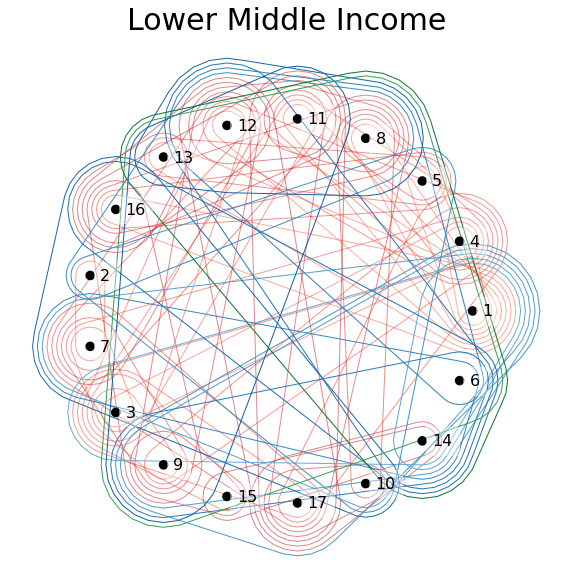

In [48]:
H_lmi = hnx.Hypergraph(edges_lmi)

plot_whole_hx(H_lmi, cmaps_list, "Lower Middle Income", "LMI")

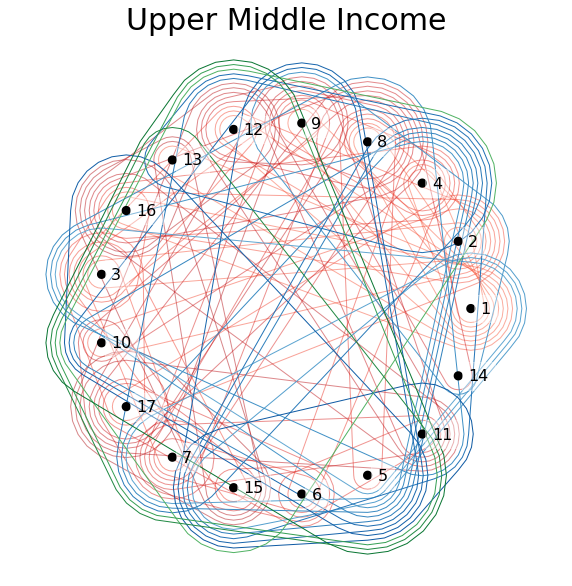

In [49]:
H_umi = hnx.Hypergraph(edges_umi)

plot_whole_hx(H_umi, cmaps_list, "Upper Middle Income", "UMI")

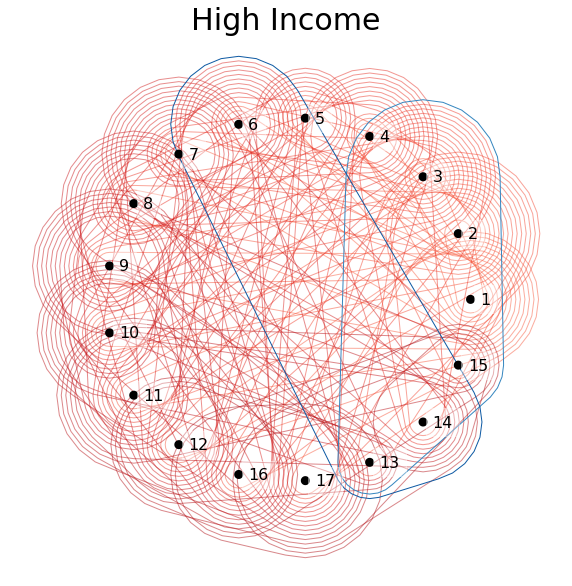

In [50]:
H_hi = hnx.Hypergraph(edges_hi)

plot_whole_hx(H_hi, cmaps_list, "High Income", "HI")

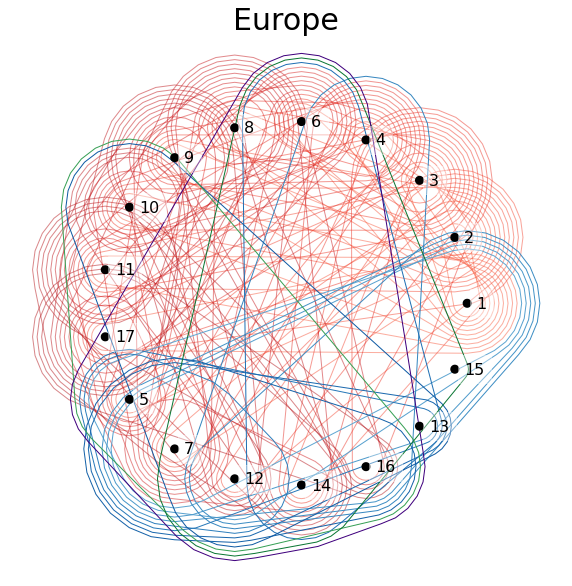

In [51]:
H_e = hnx.Hypergraph(edges_e)

plot_whole_hx(H_e, cmaps_list, "Europe", "E")

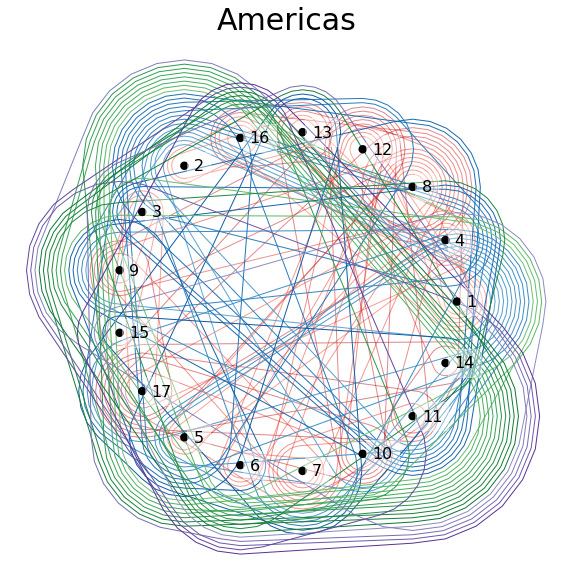

In [52]:
H_am = hnx.Hypergraph(edges_am)

plot_whole_hx(H_am, cmaps_list, "Americas", "AM")

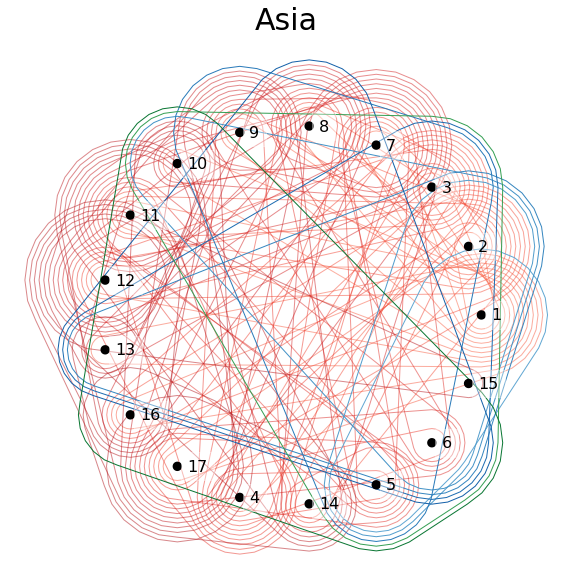

In [53]:
H_as = hnx.Hypergraph(edges_as)

plot_whole_hx(H_as, cmaps_list, "Asia", "AS")

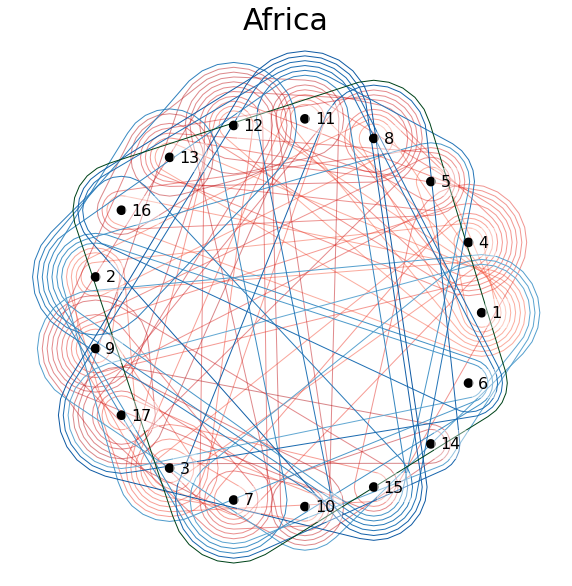

In [54]:
H_af = hnx.Hypergraph(edges_af)

plot_whole_hx(H_af, cmaps_list, "Africa", "AF")